In [95]:
# importing the important machine learning libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns

In [96]:
# converting the dataframe to dataset
dataframe_tesla_share=pd.read_csv("D:\datasets2\TSLA.csv")
dataframe_tesla_share

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [97]:
# changing the format of the date column acc to need
dataframe_tesla_share['Date']=pd.to_datetime(dataframe_tesla_share['Date'])
dataframe_tesla_share['Date']=dataframe_tesla_share['Date'].dt.strftime('%d-%m-%Y')

In [98]:
# setting the date column as the index
dataframe_tesla_share.set_index('Date',inplace=True)
dataframe_tesla_share.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


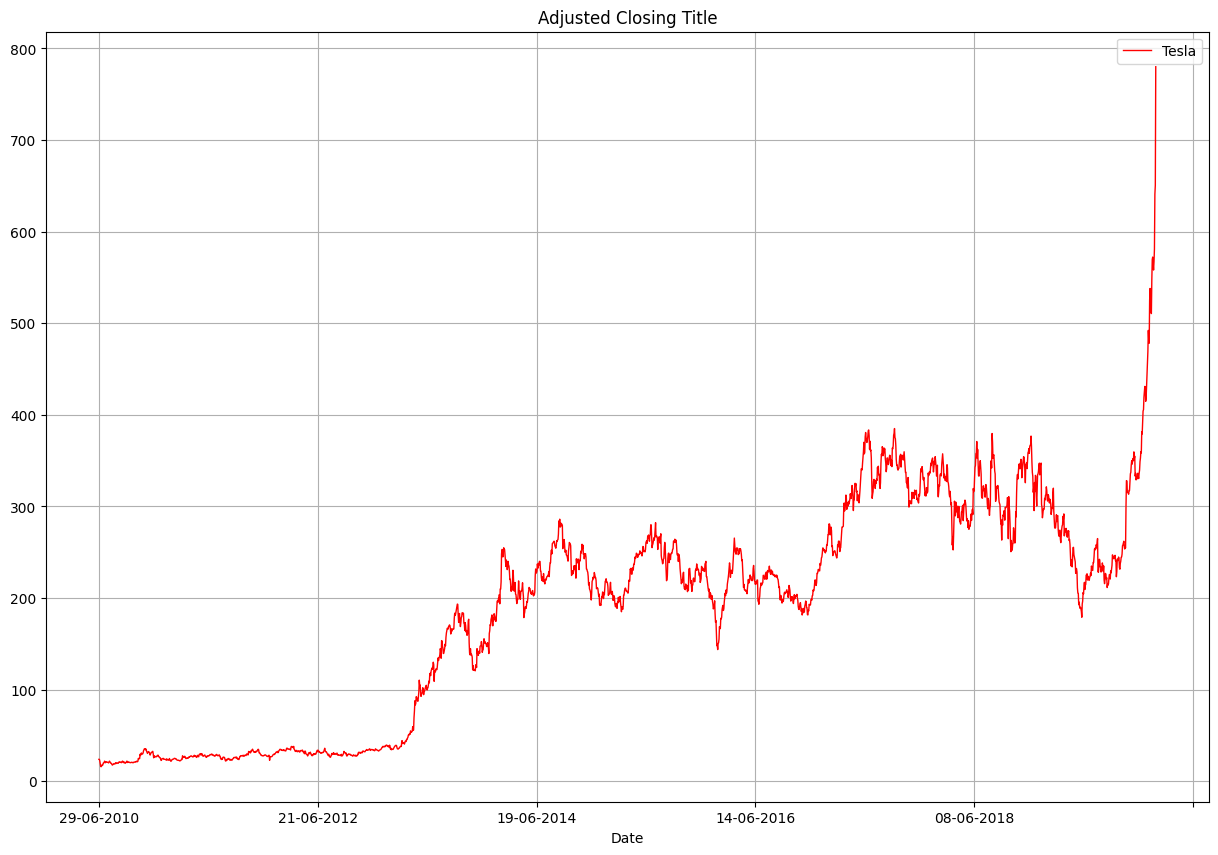

In [99]:
# plotting the adjusted close column of the dataset in the graph
dataframe_tesla_share['Adj Close'].plot(label='Tesla',figsize=(15,10),title='Adjusted Closing Title',color='red',linewidth=1.0,grid=True)
plt.legend()

In [100]:
# calulating the moving average of the adjusted closing column
close_col=dataframe_tesla_share['Adj Close']
mvag=close_col.rolling(window=100).mean()

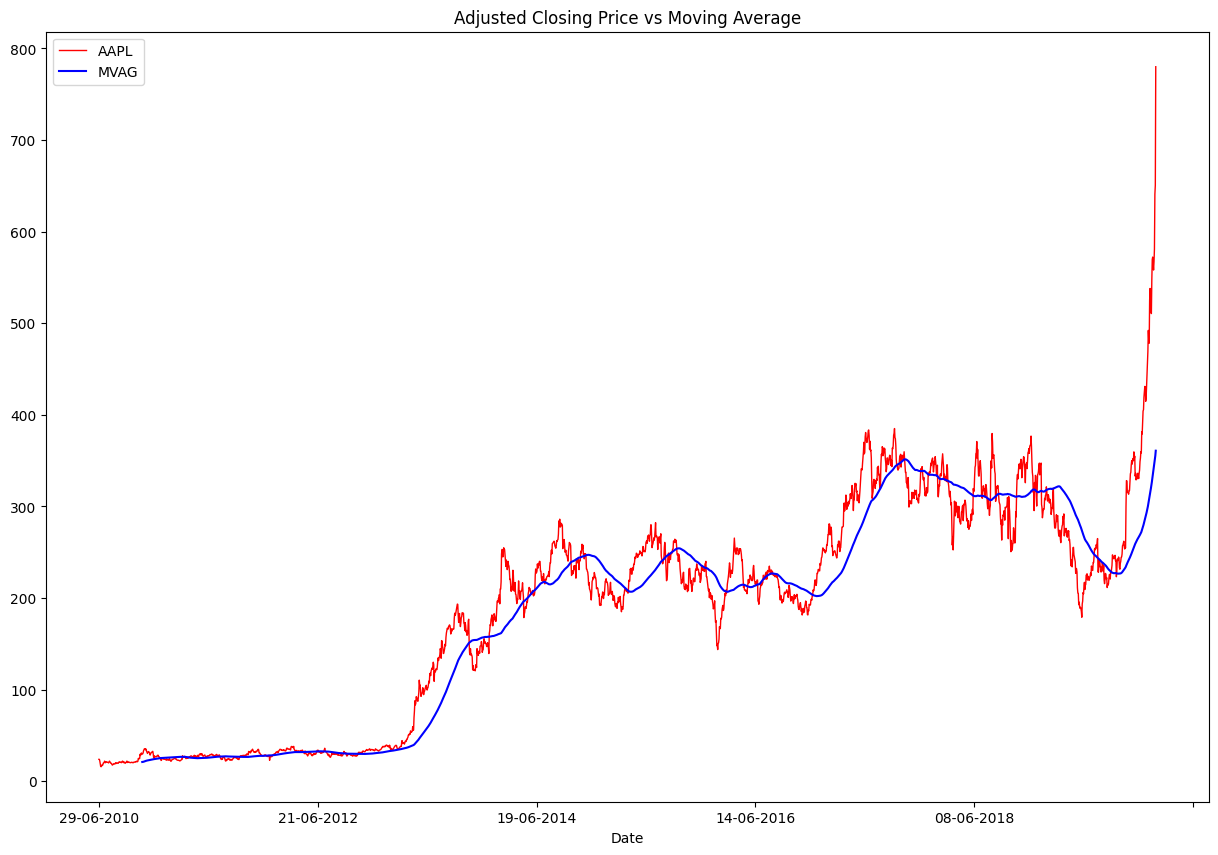

In [101]:
# plotting the adjusted close column of the dataset against the moving average of the dataset
dataframe_tesla_share['Adj Close'].plot(label='AAPL', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

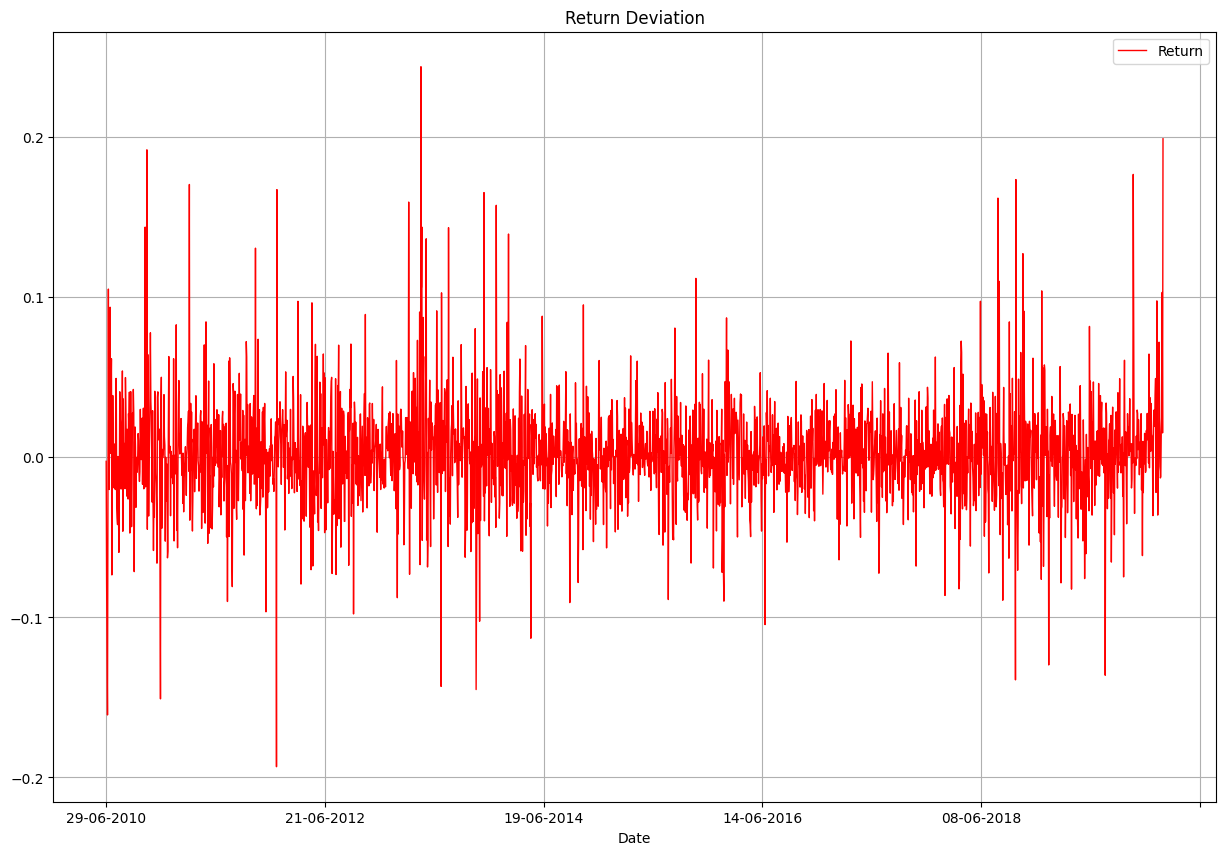

In [102]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

return_deviation=close_col/close_col.shift(1) -1 
return_deviation.plot(label='Return',figsize=(15,10),title='Return Deviation',color='Red',linewidth=1.0,grid=True)
plt.legend()

rd = close_col / close_col.shift(1) - 1: This line calculates the daily return of the stock. It does this by taking the ratio of each day's closing price to the previous day's closing price, and then subtracting 1. This formula gives the percentage change in the stock price from one day to the next.

In [103]:
# Number of days for which to predict the stock prices
predict_days = 30

In [104]:
# Shifting by the Number of Predict days for Prediction array

dataframe_tesla_share['Prediction']=dataframe_tesla_share['Adj Close'].shift(-predict_days)
print(dataframe_tesla_share['Prediction'])
print(dataframe_tesla_share['Adj Close'])

Date
29-06-2010    17.900000
30-06-2010    17.600000
01-07-2010    18.320000
02-07-2010    18.780001
06-07-2010    19.150000
                ...    
28-01-2020          NaN
29-01-2020          NaN
30-01-2020          NaN
31-01-2020          NaN
03-02-2020          NaN
Name: Prediction, Length: 2416, dtype: float64
Date
29-06-2010     23.889999
30-06-2010     23.830000
01-07-2010     21.959999
02-07-2010     19.200001
06-07-2010     16.110001
                 ...    
28-01-2020    566.900024
29-01-2020    580.989990
30-01-2020    640.809998
31-01-2020    650.570007
03-02-2020    780.000000
Name: Adj Close, Length: 2416, dtype: float64


<Axes: >

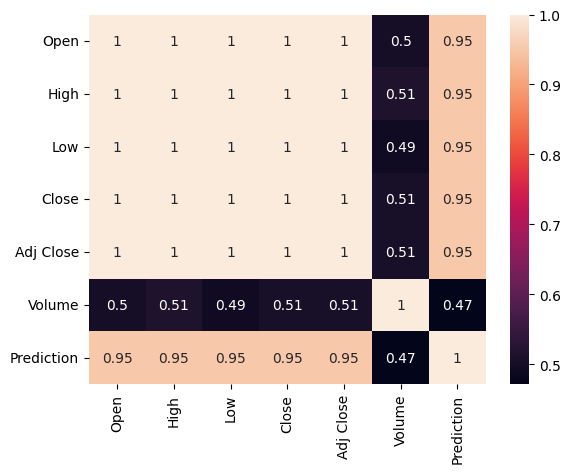

In [105]:
# taking a look at the correlation between different column in the dataset
correlation=dataframe_tesla_share.corr()
sns.heatmap(data=correlation,annot=True)

In [106]:
# independent feature of the datadrame after removing the highly correlated columns
X=np.array(dataframe_tesla_share.drop(['Prediction','Close','Open','High','Low'],axis=1))
X=X[:-predict_days]
print(X)
print(X.shape)

[[2.38899990e+01 1.87663000e+07]
 [2.38300000e+01 1.71871000e+07]
 [2.19599990e+01 8.21880000e+06]
 ...
 [3.81500000e+02 1.81742000e+07]
 [3.78989990e+02 8.49680000e+06]
 [3.93149994e+02 1.41210000e+07]]
(2386, 2)


In [107]:
# target feature of the dataset

y = np.array(dataframe_tesla_share['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(2386,)


In [108]:
# splitting the data frame into training and test dataset

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1908, 2)
(1908,)
(478, 2)
(478,)


In [109]:
# making a model for linear regression
model_linear_regression=LinearRegression()
model_linear_regression.fit(xtrain,ytrain)

LinearRegression()

In [110]:
# printing the score of the model
print("score of the model : ",model_linear_regression.score(xtest,ytest))

score of the model :  0.9137950531941113


In [ ]:
# making the model with ridge regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(xtrain, ytrain)

Ridge(alpha=0.5)

In [ ]:
# printing the score of the model

print('Ridge Model score:', ridge_model.score(xtest,ytest))

Ridge Model score: 0.9137950529865159


In [ ]:
# making the model with lasso regression
lasso_model=Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [ ]:
# printing the score of the model

print('Lasso Model score:',lasso_model.score(xtest,ytest))

Ridge Model score: 0.9137942765605651
